## Tensors

In [28]:
import torch
import numpy as np

from torch import nn
from torch.utils.data import Dataset, DataLoader

from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


In [29]:
data = [[1, 2], [3, 4]]

x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [30]:
x_data.shape

torch.Size([2, 2])

In [31]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [39]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4810, 0.7930],
        [0.0653, 0.7012]]) 



In [5]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.1925, 0.9183, 0.2105],
        [0.1795, 0.5592, 0.4306]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [41]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Operations on Tensors

In [9]:
torch.cuda.is_available()

False

In [42]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [43]:
tensor = torch.rand(4, 4)

print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:, 1] = 0
print(tensor)

First row: tensor([0.4702, 0.9672, 0.1714, 0.5222])
First column: tensor([0.4702, 0.6757, 0.6485, 0.4629])
Last column: tensor([0.5222, 0.4920, 0.7544, 0.5145])
tensor([[0.4702, 0.0000, 0.1714, 0.5222],
        [0.6757, 0.0000, 0.3440, 0.4920],
        [0.6485, 0.0000, 0.2823, 0.7544],
        [0.4629, 0.0000, 0.4108, 0.5145]])


In [26]:
tensor

tensor([[0.1871, 0.0000, 0.3559, 0.2608],
        [0.8925, 0.0000, 0.2100, 0.6216],
        [0.1612, 0.0000, 0.6178, 0.5668],
        [0.5735, 0.0000, 0.8098, 0.2676]])

In [29]:
tensor[0, ...]

tensor([0.1871, 0.0000, 0.3559, 0.2608])

In [47]:
tensor1 = torch.ones((2, 2))
tensor2 = torch.zeros((2, 2))
tensor3 = torch.ones((2, 2)) * 2

t1 = torch.cat([tensor1, tensor2, tensor3], dim=1)
print(t1)

tensor([[1., 1., 0., 0., 2., 2.],
        [1., 1., 0., 0., 2., 2.]])


In [52]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
tensor = torch.ones((2, 2))
y1 = tensor @ tensor.T

print(tensor)

y1

tensor([[1., 1.],
        [1., 1.]])


tensor([[2., 2.],
        [2., 2.]])

In [54]:
y2 = tensor.matmul(tensor.T)

y2

tensor([[2., 2.],
        [2., 2.]])

In [57]:
y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

y3

tensor([[2., 2.],
        [2., 2.]])

In [59]:
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

y3

tensor([[2., 2.],
        [2., 2.]])

## Model

In [44]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.75, random_state=42)

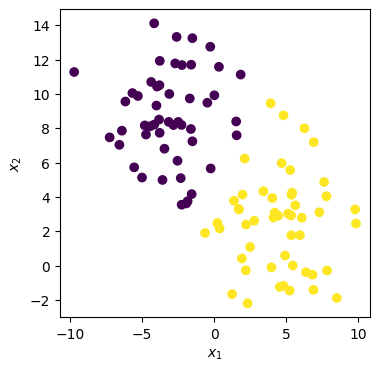

In [45]:
fig, ax = plt.subplots(figsize=(4, 4))

_ = ax.scatter(X[:, 0], X[:, 1], c=y)

_ = ax.set_xlabel("$x_1$")
_ = ax.set_ylabel("$x_2$")

In [46]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

print(X.shape)
print(y.shape)

torch.Size([100, 2])
torch.Size([100, 1])


In [18]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(2, 1)

    def forward(self, x):
        x = self.fc1(x)
        output = torch.sigmoid(x)
        return output

In [50]:
m = NeuralNetwork()
m

NeuralNetwork(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)

In [52]:
def train(model, criterion, optimizer, X):
    
    size = X.shape[0]
    correct = 0
    
    model.train()
    optimizer.zero_grad()  # instead model.zero_grad()

    # Feed-forward
    pred = model(X)
    loss = criterion(pred, y)

    # Back-propagation
    loss.backward()
    optimizer.step()

    loss = loss.item()
    
    # Calculate train accuracy
    correct += (torch.where(pred > 0.5, 1, 0) == y).sum().item()
    accuracy = correct / size

    return model, loss, accuracy

In [53]:
model = NeuralNetwork()

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

epochs = 250
losses, accuracies = list(), list()
weights, bias = dict(), dict()

print(f"Training with {epochs} epochs started:\n")
for i in range(epochs + 1):
    model, loss, acc = train(model, criterion, optimizer, X)
    losses.append(loss)
    accuracies.append(acc)
    
    if i % 50 == 0 or i == 0:
        weights[i] = model.fc1.weight[0].clone()
        bias[i] = model.fc1.bias[0].clone()
        print(f"Epoch {i}:\tloss: {loss:>7f}\t train_acc: {acc:>10f}")
        
print("\nDone!")

Training with 250 epochs started:

Epoch 0:	loss: 0.717508	 train_acc:   0.670000
Epoch 50:	loss: 0.067693	 train_acc:   0.980000
Epoch 100:	loss: 0.059704	 train_acc:   0.990000
Epoch 150:	loss: 0.055314	 train_acc:   0.990000
Epoch 200:	loss: 0.052291	 train_acc:   0.990000
Epoch 250:	loss: 0.049959	 train_acc:   0.990000

Done!


In [38]:
# Our "model"
x = torch.tensor([1., 2.], requires_grad=True)
y = 100*x

# Compute loss
loss = y.sum()

# Compute gradient of the loss w.r.t. to the parameters  
print(x.grad)     # None
loss.backward()      
print(x.grad)     # tensor([100., 100.])

# MOdify the parameters by subtracting the gradient
optim = torch.optim.SGD([x], lr=0.001)
print(x)        # tensor([1., 2.], requires_grad=True)
optim.step()
print(x)        # tensor([0.9000, 1.9000], requires_grad=True)

None
tensor([100., 100.])
tensor([1., 2.], requires_grad=True)
tensor([0.9000, 1.9000], requires_grad=True)


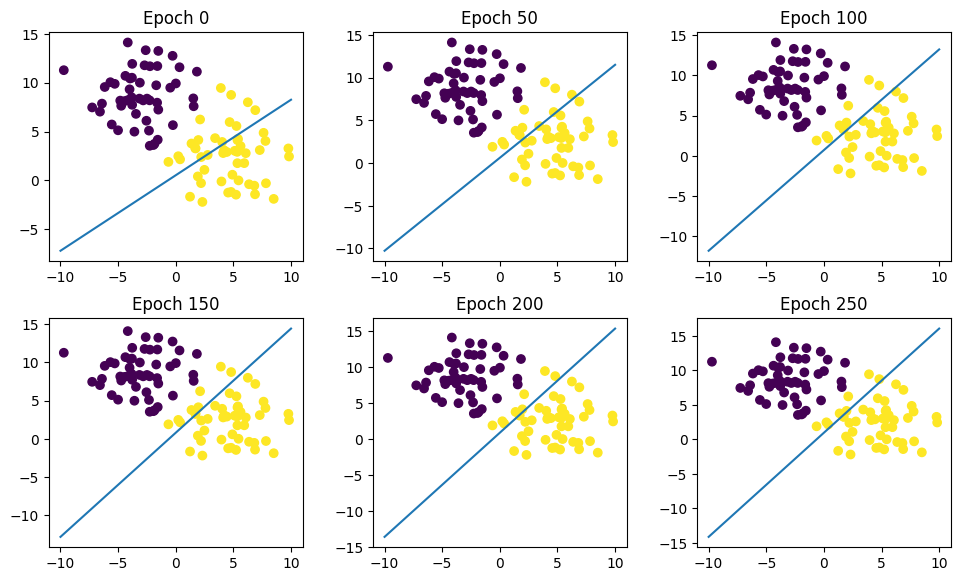

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
fig.tight_layout(pad=2)

idx = 0
for i in range(2):
    for j in range(3):
        est = torch.arange(-10, 11) * weights[idx][0] + bias[idx]
        _ = axes[i, j].scatter(X[:, 0], X[:, 1], c=y)
        _ = axes[i, j].plot(torch.arange(-10, 11), est.detach().numpy())
        _ = axes[i, j].set_title(f"Epoch {idx}")
        idx += 50

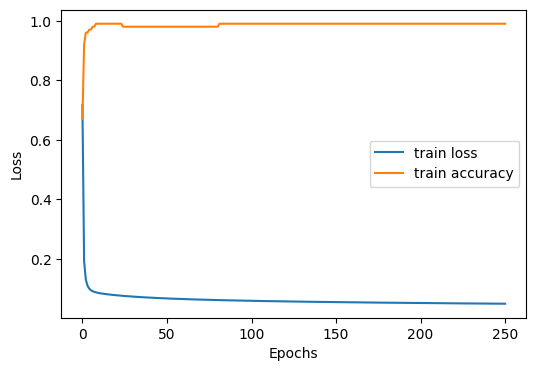

In [55]:
fig, ax = plt.subplots(figsize=(6, 4))

_ = ax.plot(losses, label="train loss")
_ = ax.plot(accuracies, label="train accuracy")

_ = ax.set_xlabel("Epochs")
_ = ax.set_ylabel("Loss")

_ = ax.legend()

In [83]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=5, n_classes=2, random_state=48)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)


class NeuralNetwork(nn.Module):
    def __init__(self, n_features: int):
        super().__init__()
        
        self.fc1 = nn.Linear(n_features, 32)
        self.act1 = nn.Sigmoid()
        self.fc2 = nn.Linear(32, 64)
        self.act2 = nn.Sigmoid()
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        output = torch.sigmoid(x)
        return output
    
model = NeuralNetwork(n_features=5)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

epochs = 400
losses = list()
weights, bias = dict(), dict()
for i in range(epochs + 1):
    model, loss = train(model, criterion, optimizer, X)
    losses.append(loss)
    
    if i % 50 == 0 or i == 0:
        weights[i] = model.fc1.weight[0].clone()
        bias[i] = model.fc1.bias[0].clone()
        print(f"Epoch {i}:\t", end="")
        print(f"loss: {loss:>7f}")
    # test_loop(test_dataloader, model, loss_fn)
print("\nDone!")

Epoch 0:	loss: 0.694369
Epoch 50:	loss: 0.682716
Epoch 100:	loss: 0.664421
Epoch 150:	loss: 0.619918
Epoch 200:	loss: 0.513528
Epoch 250:	loss: 0.409876
Epoch 300:	loss: 0.383210
Epoch 350:	loss: 0.379134
Epoch 400:	loss: 0.378287

Done!


In [4]:
class SimpleData(Dataset):
    def __init__(self, x, y, transform=None, target_transform=None) -> None:
        super(Dataset).__init__()
        self.x = x
        self.y = y
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        if self.transform:
            self.x = self.transform(self.x)
        if self.target_transform:
            self.y = self.target_transform(self.y)
            
        return self.x[index], self.y[index]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print(f"x_train's shape: {x_train.shape}")
print(f"y_train's shape: {y_train.shape}")
print()
print(f"x_test's shape: {x_test.shape}")
print(f"y_test's shape: {y_test.shape}")

x_train's shape: (90, 2)
y_train's shape: (90,)

x_test's shape: (10, 2)
y_test's shape: (10,)
